### Abstract
Viewing the file we can explore some of the effects on the GPA (grape point average) by the other variables. Considering the short timespan for this project we will not delve deeper into the data. The file will be read, some columns and values are going to be removed, correlations are going to be measured, plots will be present, and at the end we will see some hypothesis testing.

In [78]:
%matplotlib inline

In [239]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.stats import weightstats
from scipy.stats import mstats
import seaborn as sns

# Author
## Stefan Panev

### Introduction
For the third dataset we will choose the food choices from here: https://www.kaggle.com/borapajo/food-choices#food_coded.csv. The file is saved in the data folder.

## Table of Contents:
* [Introduction](#first-bullet)
* [Reading the Data and Preprocessing](#second-bullet)
* [Correlation Analysis](#third-bullet)
* [EDA - grouping and plotting](#fourth-bullet)
* [Hypothesis testing via Z test](#fifth-bullet)
* [Conclusion](#sixth-bullet)
* [Further Development](#seventh-bullet)

### Reading the Data and Preprocessing

In [80]:
food_choices = pd.read_csv('data\\food_coded.csv', sep = ',')

In [81]:
food_choices.head()

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
0,2.4,2,1,430,NaN,315.0,1,none,we dont have comfort,9.0,...,1.0,1.0,1,1165.0,345,car racing,5,1,1315,187
1,3.654,1,1,610,3.0,420.0,2,"chocolate, chips, ice cream","Stress, bored, anger",1.0,...,1.0,1.0,2,725.0,690,Basketball,4,2,900,155
2,3.3,1,1,720,4.0,420.0,2,"frozen yogurt, pizza, fast food","stress, sadness",1.0,...,1.0,2.0,5,1165.0,500,none,5,1,900,I'm not answering this.
3,3.2,1,1,430,3.0,420.0,2,"Pizza, Mac and cheese, ice cream",Boredom,2.0,...,1.0,2.0,5,725.0,690,NaN,3,1,1315,"Not sure, 240"
4,3.5,1,1,720,2.0,420.0,2,"Ice cream, chocolate, chips","Stress, boredom, cravings",1.0,...,1.0,1.0,4,940.0,500,Softball,4,2,760,190


In [82]:
food_choices.shape

(125, 61)

This dataset is a lot smaller compared to the previous 2. We have only 125 rows and 61 columns.

In [83]:
food_choices.columns

Index(['GPA', 'Gender', 'breakfast', 'calories_chicken', 'calories_day',
       'calories_scone', 'coffee', 'comfort_food', 'comfort_food_reasons',
       'comfort_food_reasons_coded', 'cook', 'comfort_food_reasons_coded.1',
       'cuisine', 'diet_current', 'diet_current_coded', 'drink',
       'eating_changes', 'eating_changes_coded', 'eating_changes_coded1',
       'eating_out', 'employment', 'ethnic_food', 'exercise',
       'father_education', 'father_profession', 'fav_cuisine',
       'fav_cuisine_coded', 'fav_food', 'food_childhood', 'fries', 'fruit_day',
       'grade_level', 'greek_food', 'healthy_feeling', 'healthy_meal',
       'ideal_diet', 'ideal_diet_coded', 'income', 'indian_food',
       'italian_food', 'life_rewarding', 'marital_status',
       'meals_dinner_friend', 'mother_education', 'mother_profession',
       'nutritional_check', 'on_off_campus', 'parents_cook', 'pay_meal_out',
       'persian_food', 'self_perception_weight', 'soup', 'sports', 'thai_food',
       

Some of the columns contain not numerical information from quizes, such columns will be removed, others are categorical values, they will stay.

In [84]:
food_choices = food_choices.drop(['comfort_food', 'comfort_food_reasons', 'diet_current', 'eating_changes', 'father_profession',
                                  'fav_cuisine','food_childhood', 'healthy_meal','ideal_diet','meals_dinner_friend', 
                                  'mother_profession', 'type_sports'], axis = 1)

In [85]:
food_choices.shape

(125, 49)

Now we have only 49 columns, we will decrease the number of columns further for the exploration part and we can return here if we want to include all the information in a regression model.

In [86]:
food_choices.columns

Index(['GPA', 'Gender', 'breakfast', 'calories_chicken', 'calories_day',
       'calories_scone', 'coffee', 'comfort_food_reasons_coded', 'cook',
       'comfort_food_reasons_coded.1', 'cuisine', 'diet_current_coded',
       'drink', 'eating_changes_coded', 'eating_changes_coded1', 'eating_out',
       'employment', 'ethnic_food', 'exercise', 'father_education',
       'fav_cuisine_coded', 'fav_food', 'fries', 'fruit_day', 'grade_level',
       'greek_food', 'healthy_feeling', 'ideal_diet_coded', 'income',
       'indian_food', 'italian_food', 'life_rewarding', 'marital_status',
       'mother_education', 'nutritional_check', 'on_off_campus',
       'parents_cook', 'pay_meal_out', 'persian_food',
       'self_perception_weight', 'soup', 'sports', 'thai_food',
       'tortilla_calories', 'turkey_calories', 'veggies_day', 'vitamins',
       'waffle_calories', 'weight'],
      dtype='object')

In [87]:
gpa_data = food_choices.drop(['calories_day', 'comfort_food_reasons_coded', 'cook','comfort_food_reasons_coded.1',
                              'cuisine', 'diet_current_coded','eating_changes_coded', 'eating_changes_coded1', 'eating_out',
                               'employment','ethnic_food', 'exercise', 'father_education',
                               'fav_cuisine_coded', 'fav_food', 'fries', 'fruit_day', 'grade_level',
                               'greek_food', 'healthy_feeling', 'ideal_diet_coded', 'income',
                               'indian_food', 'italian_food', 'life_rewarding', 'marital_status',
                               'mother_education', 'nutritional_check', 'on_off_campus',
                               'parents_cook', 'pay_meal_out', 'persian_food',
                               'self_perception_weight', 'soup', 'sports'], axis = 1)

In [88]:
gpa_data.shape

(125, 14)

Finally we are left with only 14 columns. This can be seen below.

In [89]:
gpa_data.head()

,GPA,Gender,breakfast,calories_chicken,calories_scone,coffee,drink,thai_food,tortilla_calories,turkey_calories,veggies_day,vitamins,waffle_calories,weight
0,2.4,2,1,430,315.0,1,1.0,1,1165.0,345,5,1,1315,187
1,3.654,1,1,610,420.0,2,2.0,2,725.0,690,4,2,900,155
2,3.3,1,1,720,420.0,2,1.0,5,1165.0,500,5,1,900,I'm not answering this.
3,3.2,1,1,430,420.0,2,2.0,5,725.0,690,3,1,1315,"Not sure, 240"
4,3.5,1,1,720,420.0,2,2.0,4,940.0,500,4,2,760,190


### Correlation Analysis

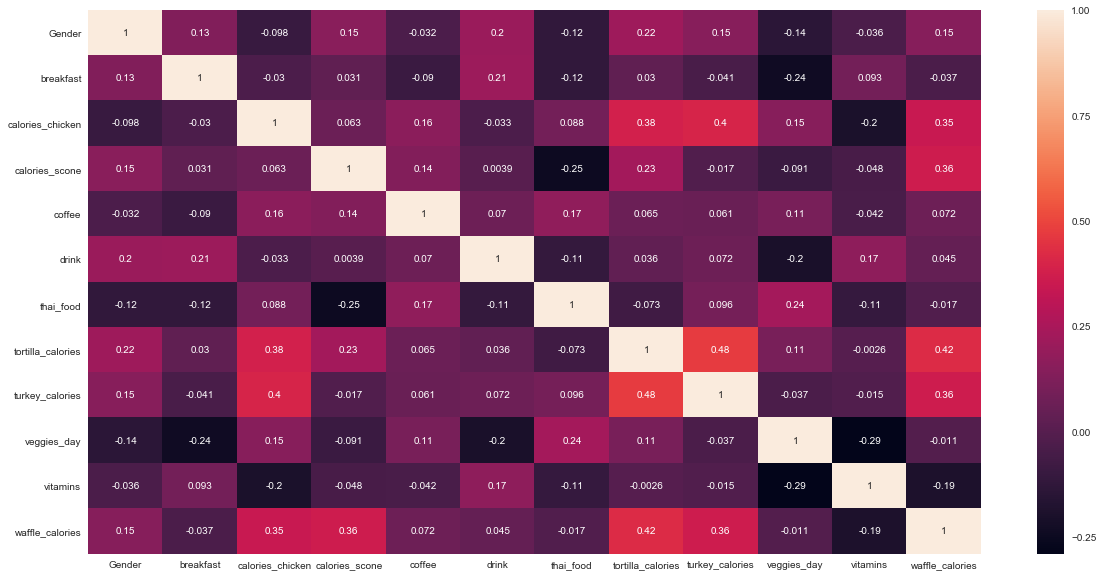

In [90]:
plt.figure(figsize=(20,10))
sns.heatmap(gpa_data.corr(), annot = True)

We will start by creating a correlation matrix from the library seaborn with a heat map inside. The closer to one the higher the correlation, closer to zero mark the lack of correlation, while negative values mark negative correlation. For more information about correlation you can check https://www.kdnuggets.com/2017/02/datascience-introduction-correlation.html. Correlation does not mean a causal relationship between the variables. There is also the false correlation effect meaning we are witnessing just a coincidence. There is also the issue that the Person correlation coefficient is only for a linear relationships. The diagonal values are correlated with themselves so they have a coefficient of 1. Looking at the matrix there does not seem to be a stong correlation. We will plot the highest values.

Text(0.5,1,'Scater Plot Correlation Coefficient = 0.48')

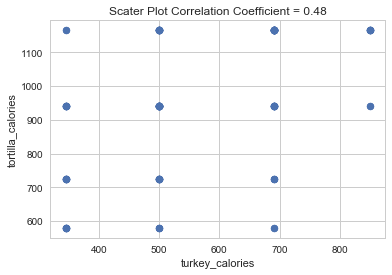

In [91]:
plt.scatter(gpa_data['turkey_calories'], gpa_data['tortilla_calories'])
plt.xlabel('turkey_calories')
plt.ylabel('tortilla_calories')
plt.title('Scater Plot Correlation Coefficient = 0.48')

The turkey calories and the tortilla calories have a 0.48 correlation coefficient. It seems that turkey may be a major part of the tortilla, although there are always other ingredients. Other scatterplots will likely be random in nature. The likely reason for the lack of any correlation is likely that this are mostly dummy variables created for specific values of categorical ones. For more information on the subject here: https://www.kdnuggets.com/2015/12/beyond-one-hot-exploration-categorical-variables.html

Text(0.5,1,'Scater Plot Correlation Coefficient = 0.11')

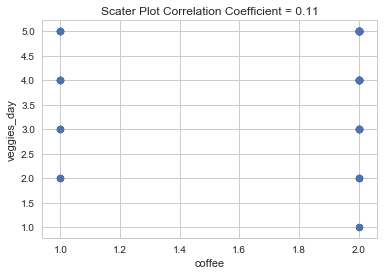

In [92]:
plt.scatter(gpa_data['coffee'], gpa_data['veggies_day'])
plt.xlabel('coffee')
plt.ylabel('veggies_day')
plt.title('Scater Plot Correlation Coefficient = 0.11')

The values don't seem to be correlated, this is due to the reason that some of them are categorical values. If we want to more exploration we should consider the chi-square test for more information see here :https://en.wikipedia.org/wiki/Chi-squared_test

### EDA - grouping and plotting
Now lets explore the GPA with a histogram. We use the unique function, 3 values are not numeric and will be removed. We now have only 122 rows. The format of the data is string, this can be seen in the describe function.

In [93]:
gpa_data['GPA'].unique()

array(['2.4', '3.654', '3.3', '3.2', '3.5', '2.25', '3.8', '3.904', '3.4',
       '3.6', '3.1', nan, '4', '2.2', '3.87', '3.7', '3.9', '2.8', '3',
       '3.65', '3.89', '2.9', '3.605', '3.83', '3.292', '3.35',
       'Personal ', '2.6', '3.67', '3.73', '3.79 bitch', '2.71', '3.68',
       '3.75', '3.92', 'Unknown', '3.77', '3.63', '3.882'], dtype=object)

In [104]:
gpa_data = gpa_data[gpa_data['GPA'] != 'Personal ']
gpa_data = gpa_data[gpa_data['GPA'] != 'Unknown']
gpa_data = gpa_data[gpa_data['GPA'] != '3.79 bitch']

In [105]:
gpa_data.shape

(122, 14)

In [112]:
gpa_data['GPA'].describe()

count     120
unique     35
top       3.5
freq       13
Name: GPA, dtype: object

(array([  3.,   7.,  27.,  19.,  21.,   4.,  12.,  10.,   3.,  14.]),
 array([  0. ,   3.4,   6.8,  10.2,  13.6,  17. ,  20.4,  23.8,  27.2,
         30.6,  34. ]),
 <a list of 10 Patch objects>)

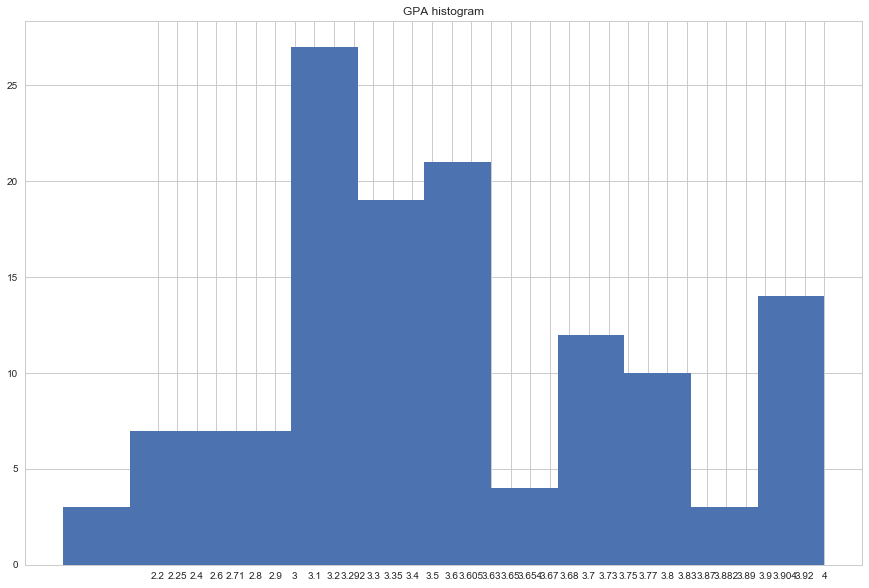

In [111]:
plt.figure(figsize=(15,10))
plt.title("GPA histogram")
plt.hist(gpa_data['GPA'].dropna(), bins = 10)

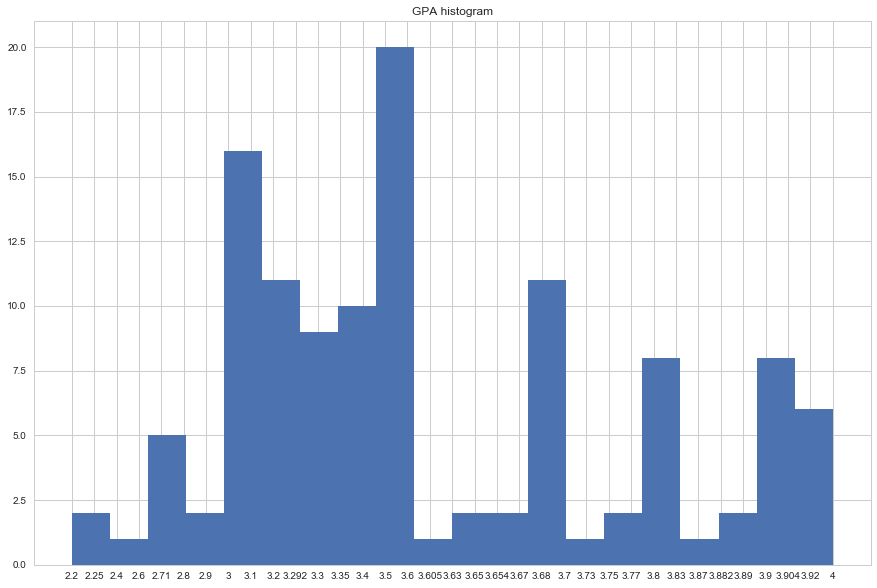

In [110]:
plt.figure(figsize=(15,10))
plt.title("GPA histogram")
plt.hist(gpa_data['GPA'].dropna(), bins = 20)

2 histograms have been plotted, the first with 10 bins, the second with 20, the second is a better considering the xticks are visible. We can see that data is fairly close to normal distribution a little elongated at the tails, there is also some rounding in the marks. Now we will convert the gpa data to float and will drop the NaN values.

In [116]:
gpa = gpa_data['GPA'].astype(float).dropna()

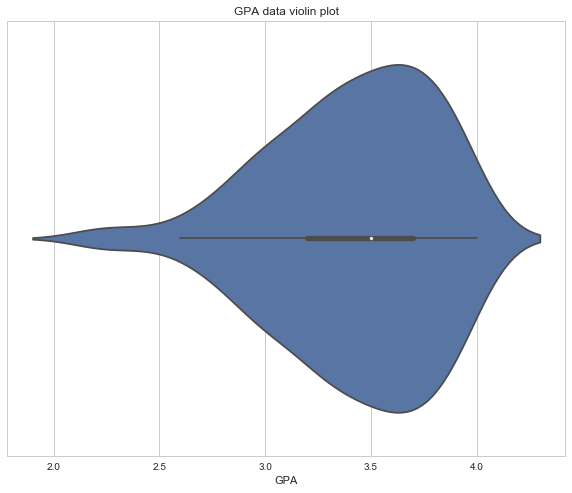

In [120]:
plt.figure(figsize=(10,8))
plt.title('GPA data violin plot')
sns.set(style="whitegrid")
ax = sns.violinplot(x=gpa)

Taking a violin plot of the gpa data we see it has an elongated left tail. Lets explore more. The skew function gives us a value below 0 confirming our previous observations for a left asymmetry. Also the mean is smaller then the median, if the distribution was symmetric they will be the same.

In [121]:
gpa.skew()

-0.74915003409886494

In [125]:
gpa.describe()

count    120.000000
mean       3.415558
std        0.390139
min        2.200000
25%        3.200000
50%        3.500000
75%        3.700000
max        4.000000
Name: GPA, dtype: float64

In [126]:
gpa.median()

3.5

In [132]:
gpa_data['Gender'].describe()

count    122.000000
mean       1.393443
std        0.490528
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        2.000000
Name: Gender, dtype: float64

Now we move to the gender variable, if we use the describe function the mean is less then 1.5 meaning there are more 1s, then 2s. 1 stands for females so they are dominating the sample. Lets use a pie chart to visualize their proportions. There are 74 females and 48 males.

In [138]:
gpa_data[gpa_data['Gender'] == 1]['Gender'].count()

74

In [139]:
gpa_data[gpa_data['Gender'] == 2]['Gender'].count()

48

In [145]:
gender = gpa_data.groupby('Gender').count()

In [156]:
gender.index = ['Female', 'Male']

In [163]:
ratio = (gpa_data[gpa_data['Gender'] == 1]['Gender'].count())/(gpa_data[gpa_data['Gender'] == 2]['Gender'].count())

In [164]:
ratio

1.5416666666666667

We set the index as male and female. The ration between the two is 1.54.

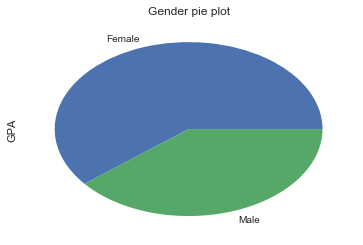

In [158]:
plt.title('Gender pie plot')
gender['GPA'].plot.pie()

Now let us explore the weights column, we will store it as the variable weight. Taking the unique function we will see that some of the data is not valid like "I'm not answering this. ", 'Not sure, 240' or '144 lbs'

In [165]:
weight = gpa_data['weight']

In [167]:
weight.unique()

array(['187', '155', "I'm not answering this. ", 'Not sure, 240', '190',
       '180', '137', '125', '116', '110', '264', '123', '185', '145',
       '170', '135', '165', '175', '195', '105', '160', '167', '115',
       '205', nan, '128', '150', '140', '120', '100', '113', '168', '169',
       '200', '265', '192', '210', '112', '144 lbs', '130', '127', '129',
       '260', '184', '138', '156'], dtype=object)

In [175]:
weight = weight[weight.values != "I'm not answering this. "]
weight = weight[weight.values != "Not sure, 240"]
weight = weight[weight.values != "144 lbs"]

In [186]:
weight = weight.astype(float).dropna()

In [187]:
weight.skew()

0.87711484152763297

In [188]:
weight.describe()

count    117.000000
mean     157.880342
std       31.003660
min      100.000000
25%      135.000000
50%      155.000000
75%      180.000000
max      265.000000
Name: weight, dtype: float64

The values are again converted to float, they as rightly asymmetric considering the the skewness coefficient is above 0. We can see its descriptive statistics.

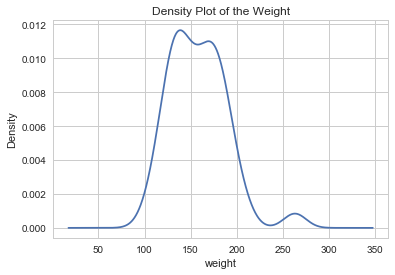

In [197]:
plt.title('Density Plot of the Weight')
plt.xlabel('weight')
weight.plot.density()

### Hypothesis testing via Z test
Now lets use a different approach this time we will plot a density plot. Looking at the plot confirms that is is slightly asymmetrical to the right.

In [204]:
average = gpa_data['GPA'].astype(float).dropna().mean()

In [209]:
average

3.4155583333333315

In [222]:
gpa_data = gpa_data[gpa_data['weight'] != "I'm not answering this. "]
gpa_data = gpa_data[gpa_data['weight'] != "Not sure, 240"]
gpa_data = gpa_data[gpa_data['weight'] != "144 lbs"]

In [223]:
high_gpa = gpa_data[gpa_data['GPA'].astype(float) > average]

In [224]:
low_gpa = gpa_data[gpa_data['GPA'].astype(float) <= average]

In [225]:
high_gpa.head()

,GPA,Gender,breakfast,calories_chicken,calories_scone,coffee,drink,thai_food,tortilla_calories,turkey_calories,veggies_day,vitamins,waffle_calories,weight
1,3.654,1,1,610,420.0,2,2.0,2,725.0,690,4,2,900,155
4,3.5,1,1,720,420.0,2,2.0,4,940.0,500,4,2,760,190
6,3.8,2,1,610,420.0,2,1.0,5,940.0,690,4,1,1315,180
10,3.5,1,1,610,980.0,2,2.0,2,940.0,345,5,2,900,116
11,3.904,1,1,720,420.0,2,1.0,5,940.0,500,5,1,900,110


In [226]:
high_gpa.shape

(62, 14)

In [227]:
low_gpa.head()

,GPA,Gender,breakfast,calories_chicken,calories_scone,coffee,drink,thai_food,tortilla_calories,turkey_calories,veggies_day,vitamins,waffle_calories,weight
0,2.4,2,1,430,315.0,1,1.0,1,1165.0,345,5,1,1315,187
5,2.25,1,1,610,980.0,2,2.0,4,940.0,345,1,2,1315,190
7,3.3,1,1,720,420.0,1,2.0,1,725.0,500,4,2,1315,137
8,3.3,1,1,430,420.0,1,1.0,5,725.0,345,3,2,760,180
9,3.3,1,1,430,315.0,2,1.0,4,580.0,345,5,1,900,125


In [228]:
low_gpa.shape

(55, 14)

Finally lets split the table into 2 parts of low and high gpa with the dividing part being the mean or 3.41.We will test if there is  difference in the weight of the 2 groups. This will tell us if the weight is having a statistically significant effect. Lets use a boxplot first. We again need to remove the invalid rows.

C:\Users\Stefan\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


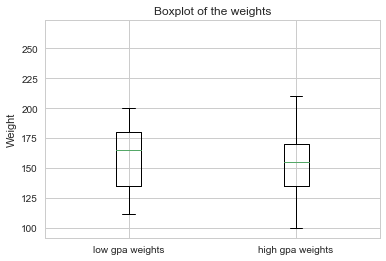

In [230]:
plt.boxplot([low_gpa['weight'].astype(float).dropna(), high_gpa['weight'].astype(float)], labels = ["low gpa weights", "high gpa weights"])
plt.ylabel("Weight")
plt.title('Boxplot of the weights')
plt.show()

At first glance it seems that the low gpa have an average higher weight and a more right asymmetrical. Lets use the skew function to see more.

In [231]:
low_gpa['weight'].astype(float).dropna().skew()

1.043960686080514

In [232]:
high_gpa['weight'].astype(float).dropna().skew()

0.69642826590945905

Both have a right asymmetricity more evident in the low_gpa weights. According this study https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5222954/ there is a negative link between the weigh of the student and their academic performance. Let see if our results will agree with the study. 
<br>
This time we will use a z test, considering we have more then 30 observations in both population (according to other sources its 50) otherwise we will do Sudent's t test.
The null hypothesis H0 is that we don't have a difference, the alternative H1 is that we have. We assume a normal distribution of the variables.

Text(0.5,1,'low gpa weights histogram')

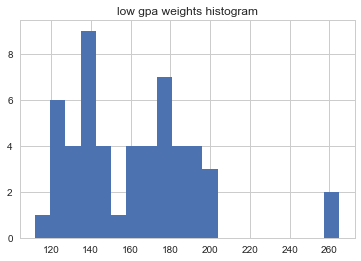

In [234]:
plt.hist(low_gpa['weight'].astype(float).dropna(), bins = 20)
plt.title('low gpa weights histogram')

Text(0.5,1,'high gpa weights histogram')

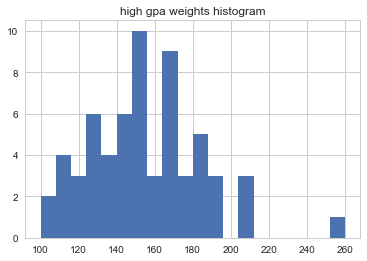

In [235]:
plt.hist(high_gpa['weight'].astype(float).dropna(), bins = 20)
plt.title('high gpa weights histogram')

The higher one is closer to the normal, although both have 3 total outliers. We have enough population so that the outliers don't have a major effect so we decide to leave them here this time. If should be tried to remove them to see if there is a major difference in the results.
<br>
Now lets start the z test you can read more here about it http://www.statsmodels.org/dev/generated/statsmodels.stats.weightstats.ztest.html. The samples are assumed to be independent, i don't see how the weight of someone will affect the weight of other people, so lets keep this assumption present.

In [240]:
z, p = weightstats.ztest(low_gpa['weight'].astype(float).dropna(),high_gpa['weight'].astype(float))

In [241]:
z, p

(1.1980326329585269, 0.23090431307306936)

The p-value is grater then our default value of 0.05 so we conclude that the H0 hypothesis is the correct one. Our study contradicts the previous study. The likely have a larger sample size, our samples the distributions are not entirely normal but lets assume they are. More evaluation is needed in the future.

### Conclusion
We had some short introduction to this file, we have gained some understanding of the makeups of some columns and performed a hypothesis testing to if the gpa has an effect on the weight. This turned out negative contradicting the mentioned study above.

### Further Development
Provided we have more time, more of the variables need to be explored, some regression model can be tried out, more in depth exploration of the categorical variables is needed.